# Project: Putting Your LLM Knowledge to Work

### Part 1: Exploring Tokenization and Embeddings

In [1]:
from transformers import BertTokenizer

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample text from To Kill a Mockingbird
text = "Mockingbirds don’t do one thing but make music for us to enjoy. \
They don’t eat up people’s gardens, don’t nest in corncribs, \
they don’t do one thing but sing their hearts out for us. \
That’s why it’s a sin to kill a mockingbird."

# Tokenize text
tokens = tokenizer.tokenize(text)

# Print the tokenized words
print(tokens)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

['mocking', '##birds', 'don', '’', 't', 'do', 'one', 'thing', 'but', 'make', 'music', 'for', 'us', 'to', 'enjoy', '.', 'they', 'don', '’', 't', 'eat', 'up', 'people', '’', 's', 'gardens', ',', 'don', '’', 't', 'nest', 'in', 'corn', '##cr', '##ib', '##s', ',', 'they', 'don', '’', 't', 'do', 'one', 'thing', 'but', 'sing', 'their', 'hearts', 'out', 'for', 'us', '.', 'that', '’', 's', 'why', 'it', '’', 's', 'a', 'sin', 'to', 'kill', 'a', 'mocking', '##bird', '.']


In [ ]:
# Analyze tokens

print(len(tokens))

# Note that, as shown in the output above, longer words such as "mockingbird" are split into multiple tokens: "mocking" and "##birds," and likewise for "corncribs"

67


In [3]:
from transformers import BertModel
import torch

# Initialize model
model = BertModel.from_pretrained('bert-base-uncased')

# Encode text to get token embeddings
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# Extract the embeddings
embeddings = outputs.last_hidden_state

# Get embeddings for tokens
token_embeddings = embeddings.squeeze(0).detach().numpy()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

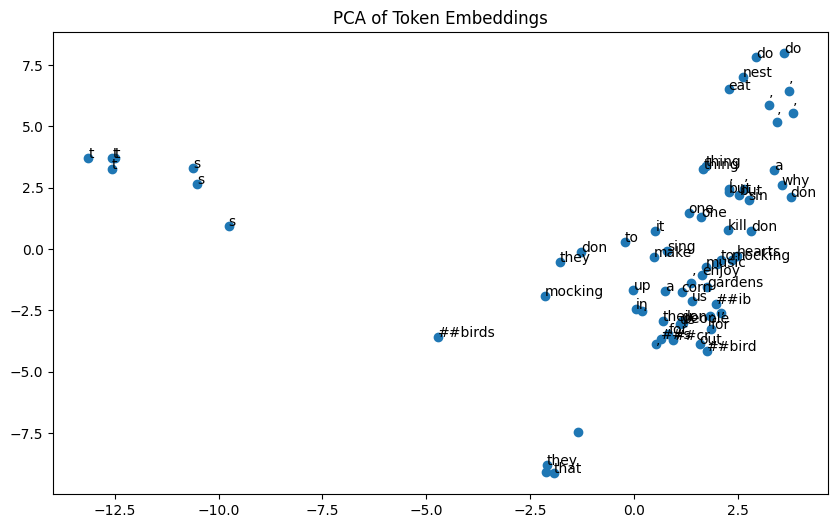

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(token_embeddings)

# Plot 2D embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Annotate points with tokens
for i, token in enumerate(tokens):
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("PCA of Token Embeddings - TKaM Text")
plt.show()


### Part 2: Crafting the Perfect Prompt

1. Prompts

- **Generic Prompt:**
"Write a short story about dragons."


- **Detailed Prompt with Context:**
"Write a short story about dragons in a world where they have lived in secret for centuries, hidden from humanity. The story should follow a young dragon, named Veyla, who has just come of age and is learning to control her powers. However, there are rumors that human dragon hunters are starting to track down the hidden dragons. Veyla must decide whether to stay hidden in the mountains with her kin or venture into human lands to seek out the truth behind these rumors. The story should explore her internal conflict about trust, freedom, and the potential consequences of revealing herself to the world."


- **Highly Specific Prompt with Clear Instructions and Boundaries:**
"Write a 1,200-word short story about a dragon named Veyla, who lives in a secluded mountain range where dragons have remained in hiding for centuries. She has just turned 18, and her powers are growing stronger, but she struggles to control them. One day, while exploring the human lands out of curiosity, Veyla stumbles upon a small village where a dragon hunter named Thorne is rumored to be preparing for a large-scale hunt. The story should focus on Veyla’s emotional turmoil as she decides whether to confront Thorne and risk exposure or return to her mountains and stay hidden. Veyla’s powers should be central to the plot, but avoid action-packed fight scenes. Instead, emphasize Veyla’s internal struggle as she learns the consequences of her potential exposure. The tone should be tense, mysterious, and reflective, focusing on themes of isolation, self-discovery, and the ethical dilemmas of hiding one’s true nature."

2. Prompt Test

The last prompt gave the best result, and providing the structure and context to the model improved performance in terms of otuput.

3. Refined Prompt:

"Write a 1,200-word short story set in a world where dragons have lived in hiding for centuries, concealed in remote mountain ranges. The protagonist, a young dragon named Veyla, has just turned 18 and is beginning to come into her powers. Despite her growing abilities, she struggles to control her transformation and the elemental forces she commands. Veyla’s peaceful life is upended when she ventures into a nearby village, curious about human society, only to learn that a notorious dragon hunter named Thorne is planning a large-scale hunt in the area. As the rumors swirl, Veyla is torn between exposing herself to the humans to stop Thorne or returning to her hidden home, where her kin have lived in isolation for centuries. The story should focus on Veyla’s internal conflict and her growing realization of the consequences of her choices. The tone should be tense and reflective, avoiding action-heavy scenes, and instead concentrating on Veyla’s emotional journey, her fear of discovery, and the moral implications of revealing herself. Themes should include isolation, self-discovery, and the balance between freedom and safety."

### Project 3: Building a Mini Application - Chatbot

Implemented using Google Gemini LLM

In [5]:
!pip install google-generativeai

In [ ]:
import google.generativeai as ai

# API Key
API_KEY = '_'

# Configure the API
ai.configure(api_key=API_KEY)

# Set up prompt
prompt = "You are an historian who specializes in popular history. \
You respond to requests with a summary of the event or person with a high \
amount of detail and professionalism."

# Create a new model
model = ai.GenerativeModel("gemini-2.0-flash")
chat = model.start_chat()

chat.send_message(prompt)

# Start a conversation
converse = False # Set True to interact with chatbot

while converse:
    message = input('You: ')
    if message.lower() == 'exit':
        print('Ending Application')
        break
    response = chat.send_message(message)
    print('Chatbot:', response.text)

In [8]:
# Application test

test_1 = "Tell me about Plato"
response = chat.send_message(test_1)
print('Chatbot:', response.text)

Chatbot: Alright, let's journey back to ancient Athens to explore the life and legacy of Plato, one of the most influential philosophers in Western thought. Be prepared for a deep dive, as his ideas are layered and fascinating!

**Who Was Plato? (c. 428/427 BCE – c. 348/347 BCE)**

Plato (Greek: Πλάτων, Plátōn) was an Athenian philosopher during the Classical period in Ancient Greece. He was the founder of the Academy in Athens, the first institution of higher learning in the Western world. He is widely considered the pivotal figure in the development of Western philosophy, known for his dialogues, which are considered among the most beautiful and influential works of literature ever written. He was a student of Socrates and the teacher of Aristotle, forming a triumvirate of philosophical giants who profoundly shaped Western thought.

**Early Life and Influences:**

*   **Aristocratic Roots:** Plato was born into a prominent Athenian family. His father, Ariston, traced his lineage back

### Project 4: Advanced Prompt Techniques

1. Task: Explaining history to a general audience.

2. Prompts:
- CoT:

>Follow these steps to ensure clarity:
Set the Scene: Begin by providing historical context—describe the time period, location, and key figures involved.
Explain the Causes: What led up to the event? Break it down step by step.
Describe the Event: Narrate the event as if telling a story, using vivid details and analogies.
Analyze the Impact: Explain the short-term and long-term consequences in an easy-to-understand way.
Make it Relevant: Draw connections between this event and modern-day parallels to help the audience relate.

- Few-Shot / Examples:

*Adapted from Stanford Encyclopedia of Philosophy*

>"Plato is, by any reckoning, one of the most dazzling writers in the Western literary tradition and one of the most penetrating, wide-ranging, and influential authors in the history of philosophy. An Athenian citizen of high status, he displays in his works his absorption in the political events and intellectual movements of his time, but the questions he raises are so profound and the strategies he uses for tackling them so richly suggestive and provocative that educated readers of nearly every period have in some way been influenced by him, and in practically every age there have been philosophers who count themselves Platonists in some important respects."

- Role-Play:

>You are a passionate historian known for making history engaging and accessible to general audiences. Your goal is to explain historical events in a clear, compelling, and storytelling-driven manner.

3. Comparison

In contrast to the enhanced prompt, standard prompting produces a coherent but dry explanation of historical facts.

4. Findings

The advanced prompt produces a higher quality, more engaging output when asked historical questions, due to structuring its responses as a narrative and highlighting the relevance of the person or events.